# Probabilistic Methods (Discrete) Exercises

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn import metrics
import matplotlib.pyplot as plt
import env

In [3]:
# Getting conncection to mySQL database, and acquiring data
def get_connection(db, user=env.user, host=env.host, password=env.password):
    '''
    This function gets conncection to mySQL database
    '''
    return f'mysql+pymysql://{user}:{password}@{host}/{db}'

# Loading raw data from Curriculum_Log database
def new_data():
    '''
    This function reads the curriculum data from the mySQL database into a df.
    '''
    # Create SQL query.
    sql_query = '''
    SELECT *
    FROM
         api_access
    ;
    '''
    # Read in DataFrame from Codeup db.
    df = pd.read_sql(sql_query, get_connection('logs'))
    
    return df

In [4]:
df = new_data()

In [5]:
df.head()

,entry
0,97.105.19.58 - - [16/Apr/2019:19:34:42 +0000] ...
1,97.105.19.58 - - [16/Apr/2019:19:34:42 +0000] ...
2,97.105.19.58 - - [16/Apr/2019:19:34:44 +0000] ...
3,97.105.19.58 - - [16/Apr/2019:19:34:46 +0000] ...
4,97.105.19.58 - - [16/Apr/2019:19:34:48 +0000] ...


In [7]:
def parse_entry(entry):
    parts = entry.split()
    output = {}
    output['ip'] = parts[0]
    output['timestamp'] = parts[3][1:].replace(':', ' ', 1)
    output['request_method'] = parts[5][1:]
    output['request_path'] = parts[6]
    output['http_version'] = parts[7][:-1]
    output['status_code'] = parts[8]
    output['size'] = int(parts[9])
    output['user_agent'] = ' '.join(parts[11:]).replace('"', '')
    return pd.Series(output)

df = df.entry.apply(parse_entry)
df.timestamp = pd.to_datetime(df.timestamp)

In [8]:
df.head()

,ip,timestamp,request_method,request_path,http_version,status_code,size,user_agent
0,97.105.19.58,2019-04-16 19:34:42,GET,/api/v1/sales?page=81,HTTP/1.1,200,512495,python-requests/2.21.0
1,97.105.19.58,2019-04-16 19:34:42,GET,/api/v1/items,HTTP/1.1,200,3561,python-requests/2.21.0
2,97.105.19.58,2019-04-16 19:34:44,GET,/api/v1/sales?page=82,HTTP/1.1,200,510103,python-requests/2.21.0
3,97.105.19.58,2019-04-16 19:34:46,GET,/api/v1/sales?page=83,HTTP/1.1,200,510003,python-requests/2.21.0
4,97.105.19.58,2019-04-16 19:34:48,GET,/api/v1/sales?page=84,HTTP/1.1,200,511963,python-requests/2.21.0


***

#### Activity over time

<AxesSubplot:xlabel='timestamp', ylabel='Count'>

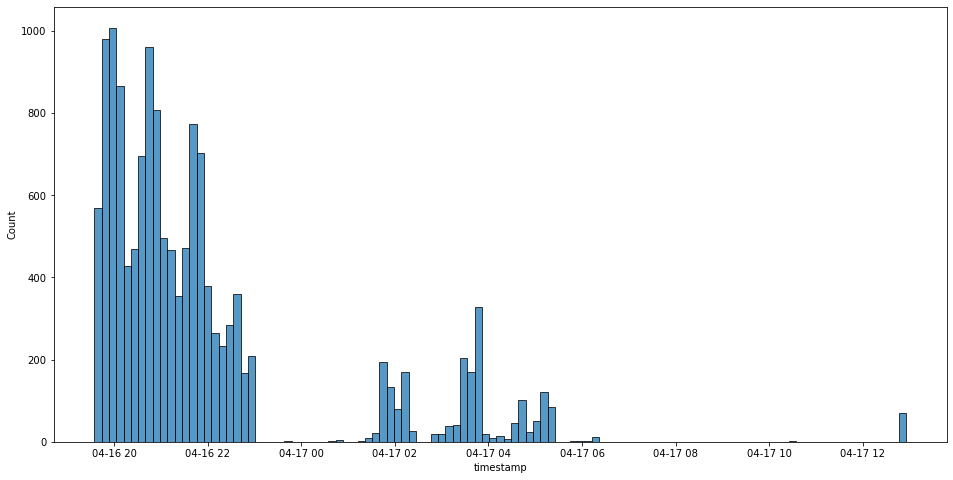

In [10]:
plt.figure(figsize = (16,8))
sns.histplot(data= df, x='timestamp')

In [11]:
def value_counts_and_frequencies(s: pd.Series, dropna=True) -> pd.DataFrame:
    return pd.merge(
        s.value_counts(dropna=False).rename('count'),
        s.value_counts(dropna=False, normalize=True).rename('proba'),
        left_index=True,
        right_index=True,
    )


value_counts_and_frequencies(df.ip)

,count,proba
97.105.19.58,11998,0.858595
173.173.113.51,1059,0.075784
72.181.113.170,613,0.043867
72.181.105.81,246,0.017604
24.26.242.9,21,0.001503
68.201.219.223,21,0.001503
70.121.214.34,2,0.000143
52.87.230.102,2,0.000143
35.175.171.137,2,0.000143
54.145.52.184,1,0.000072


**97.105.19.58** ???

<AxesSubplot:xlabel='timestamp', ylabel='Count'>

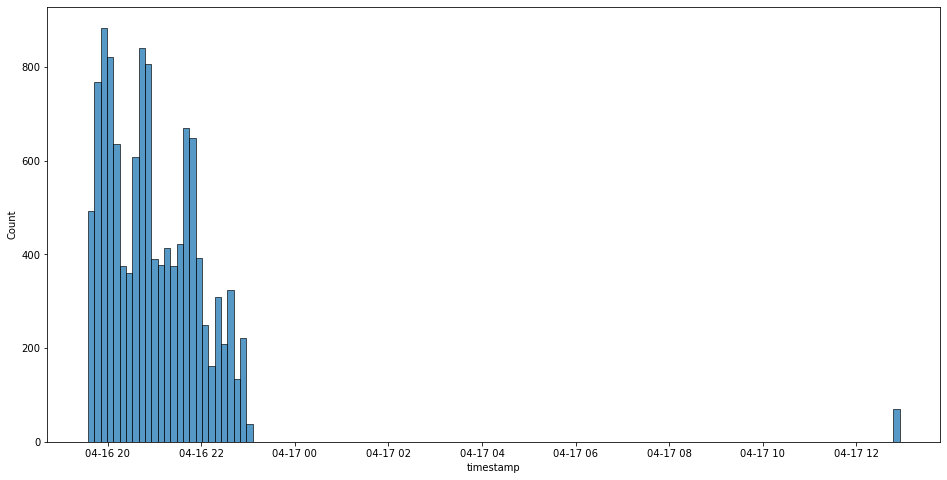

In [13]:
plt.figure(figsize = (16,8))
sns.histplot(data=df[df.ip=='97.105.19.58'], x='timestamp')

<AxesSubplot:xlabel='timestamp', ylabel='Count'>

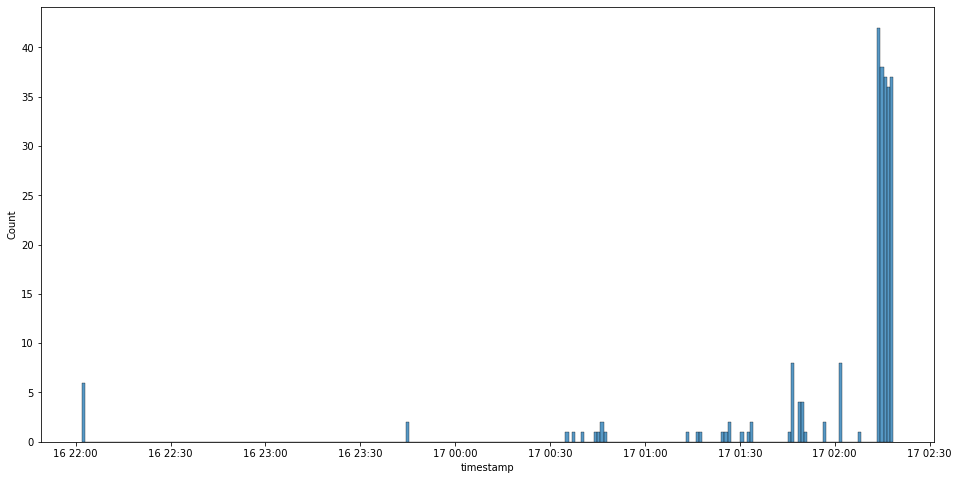

In [14]:
plt.figure(figsize = (16,8))
sns.histplot(data=df[df.ip=='72.181.105.81'], x='timestamp')